In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [47]:
# load the A3 dataframe
df = pd.read_csv('INF2178_A3_data.csv')
df.head()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2


### EDA Process

In [48]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fallreadingscore             11933 non-null  float64
 1   fallmathscore                11933 non-null  float64
 2   fallgeneralknowledgescore    11933 non-null  float64
 3   springreadingscore           11933 non-null  float64
 4   springmathscore              11933 non-null  float64
 5   springgeneralknowledgescore  11933 non-null  float64
 6   totalhouseholdincome         11933 non-null  float64
 7   incomeinthousands            11933 non-null  float64
 8   incomegroup                  11933 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 839.2 KB


In [49]:
# Check missing value
df.isnull().sum() # suprisingly no nulls!

fallreadingscore               0
fallmathscore                  0
fallgeneralknowledgescore      0
springreadingscore             0
springmathscore                0
springgeneralknowledgescore    0
totalhouseholdincome           0
incomeinthousands              0
incomegroup                    0
dtype: int64

In [50]:
# Initial descriptive statistics for the continuous variables
descriptive_stats = df.describe()
descriptive_stats

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
count,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000
mean,35.954215,27.128244,23.073694,47.511178,37.799461,28.235584,54317.199930,54.317200,1.895165
std,10.473130,9.120505,7.396978,14.327111,12.027753,7.577457,36639.061147,36.639061,0.822692
min,21.010000,10.510000,6.985000,22.350000,11.900000,7.858000,1.000000,0.001000,1.000000
25%,29.340000,20.680000,17.385000,38.950000,29.270000,22.802000,27000.000000,27.000000,1.000000
50%,34.060000,25.680000,22.954000,45.320000,36.410000,28.583000,47000.000000,47.000000,2.000000
75%,39.890000,31.590000,28.305000,51.770000,44.220000,33.782000,72000.000000,72.000000,3.000000
max,138.510000,115.650000,47.691000,156.850000,113.800000,48.345000,150000.000000,150.000000,3.000000


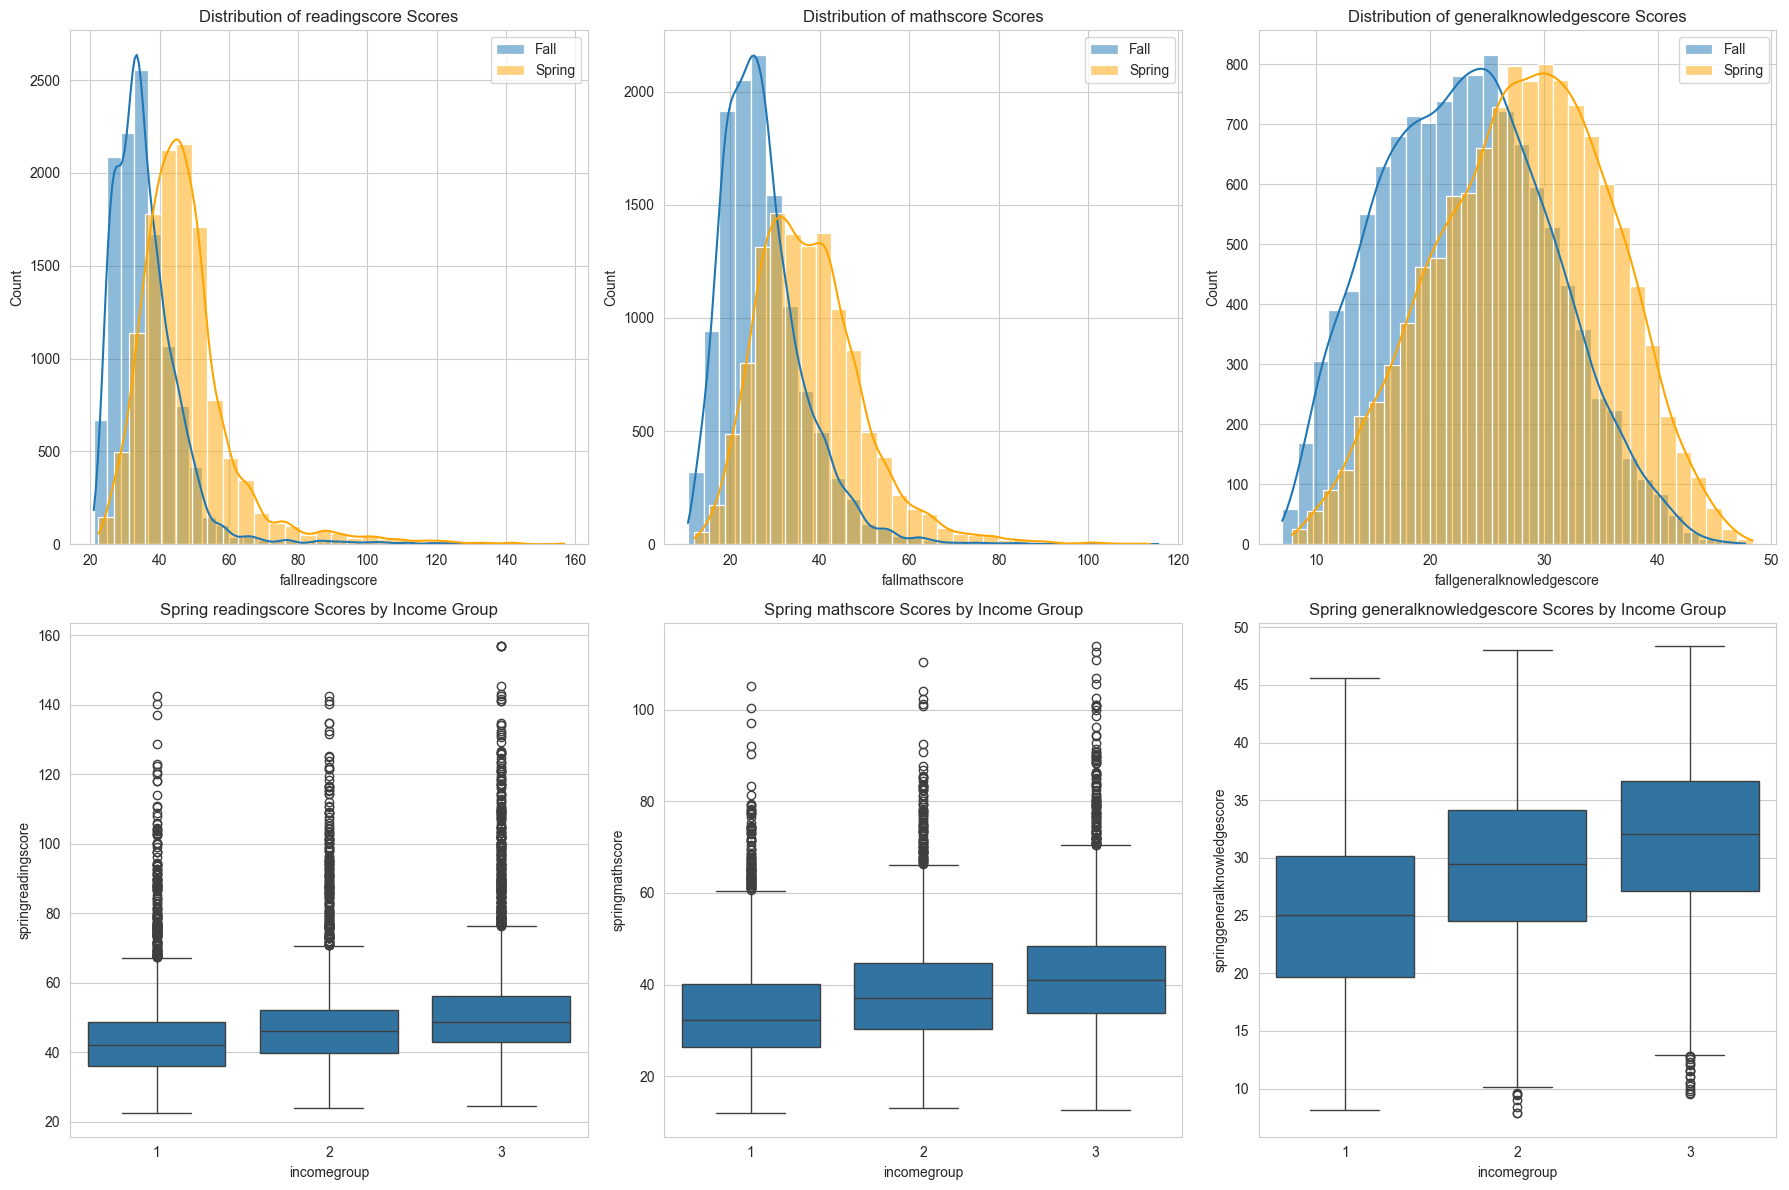

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(18, 12))

# Create subplots for each score type
for i, score_type in enumerate(['readingscore', 'mathscore', 'generalknowledgescore'], start=1):
    plt.subplot(2, 3, i)
    sns.histplot(df[f'fall{score_type}'], kde=True, bins=30, label='Fall')
    sns.histplot(df[f'spring{score_type}'], kde=True, bins=30, color='orange', label='Spring')
    plt.title(f'Distribution of {score_type} Scores')
    plt.legend()

# Create subplots for scores by income group
for i, score_type in enumerate(['readingscore', 'mathscore', 'generalknowledgescore'], start=4):
    plt.subplot(2, 3, i)
    sns.boxplot(x='incomegroup', y=f'spring{score_type}', data=df)
    plt.title(f'Spring {score_type} Scores by Income Group')

plt.tight_layout()
plt.show()

In [52]:
# calculate the improvement by substracting fall by spring reading scores
df['reading_improvement'] = df['springreadingscore'] - df['fallreadingscore']

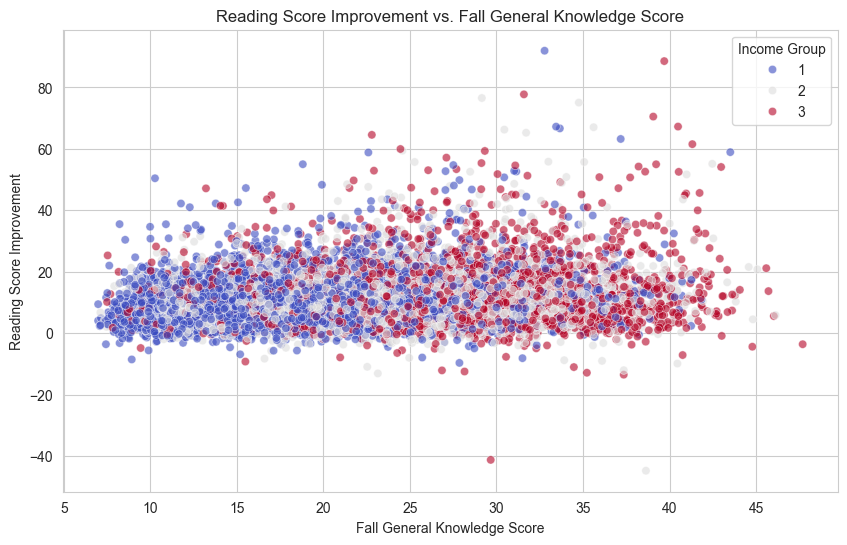

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fallgeneralknowledgescore', y='reading_improvement', data=df, hue='incomegroup', palette='coolwarm', alpha=0.6)
plt.title('Reading Score Improvement vs. Fall General Knowledge Score')
plt.xlabel('Fall General Knowledge Score')
plt.ylabel('Reading Score Improvement')
plt.legend(title='Income Group')
plt.show()

/var/folders/wn/_1pd5xy132v6z9ynwb5r94540000gn/T/ipykernel_8425/1317518112.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='incomegroup', y='springreadingscore', data=df, palette='cool', inner='quartile')


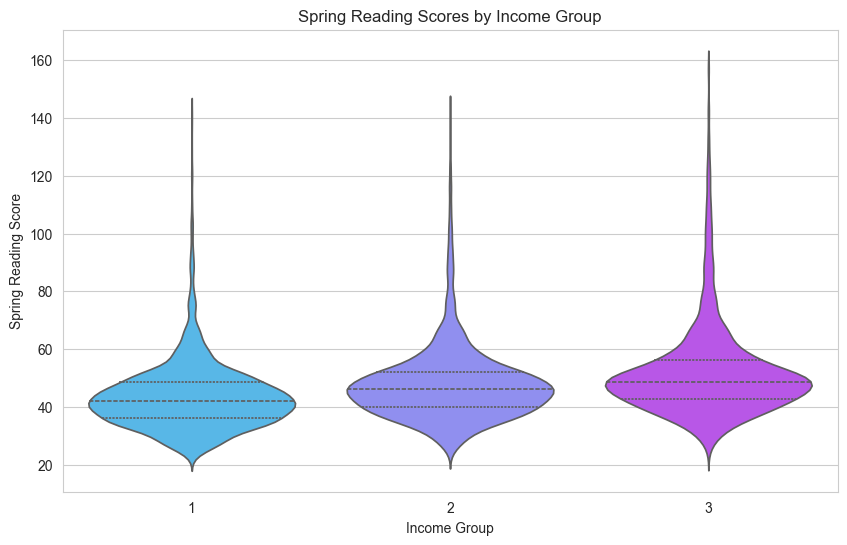

In [54]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='incomegroup', y='springreadingscore', data=df, palette='cool', inner='quartile')
plt.title('Spring Reading Scores by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Spring Reading Score')
plt.show()

## Research Questions
#### RQ1: Does the improvement from fall to spring in reading scores differ by income group, after controlling for baseline (fall) general knowledge scores?
#### RQ2: Are there differences in the improvement from fall to spring in math scores between income groups, after controlling for baseline (fall) general knowledge scores?

### Hypotheses for Research Question 1
#### Null Hypothesis H0: There is no difference in the improvement of reading scores from fall to spring between income groups, after controlling for baseline general knowledge scores.
#### Alternative Hypothesis HA: There is a difference in the improvement of reading scores from fall to spring between income groups, after controlling for baseline general knowledge scores.

In [55]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Calculate the improvement from fall to spring for reading scores
df['reading_improvement'] = df['springreadingscore'] - df['fallreadingscore']

# ANCOVA for the first research question
# Model: Reading improvement ~ Income Group + Fall General Knowledge Score
model_1 = ols('reading_improvement ~ incomegroup + fallgeneralknowledgescore', data=df).fit()
ancova_1 = anova_lm(model_1)

ancova_1

,df,sum_sq,mean_sq,F,PR(>F)
incomegroup,1.0,4198.536555,4198.536555,65.761334,5.585876e-16
fallgeneralknowledgescore,1.0,14092.411332,14092.411332,220.728284,1.735839e-49
Residual,11930.0,761671.609253,63.845064,NaN,NaN


In [56]:
# Detailed summary for the reading score improvement model
model_1_summary = model_1.summary()

model_1_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     reading_improvement   R-squared:                       0.023
Model:                             OLS   Adj. R-squared:                  0.023
Method:                  Least Squares   F-statistic:                     143.2
Date:                 Fri, 22 Mar 2024   Prob (F-statistic):           3.35e-62
Time:                         22:05:22   Log-Likelihood:                -41730.
No. Observations:                11933   AIC:                         8.347e+04
Df Residuals:                    11930   BIC:                         8.349e+04
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     7.5314      0.256     29.365      0.000       7.029       8.034
incomegroup                   0.2025      0.096      2.120      0.034       0.015       0.390
fallgeneralknowledgescore     0.1578      0.011     14.857      0.000       0.137       0.179
==============================================================================
Omnibus:                     4517.094   Durbin-Watson:                   1.715
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33257.080
Skew:                           1.632   Prob(JB):                         0.00
Kurtosis:                      10.499   Cond. No.                         86.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Hypotheses for Research Question 2
#### Null Hypothesis H0: There is no difference in the improvement of math scores from fall to spring between income groups, after controlling for baseline general knowledge scores.
#### Alternative Hypothesis HA: There is a difference in the improvement of math scores from fall to spring between income groups, after controlling for baseline general knowledge scores.

In [57]:
# Calculate the improvement from fall to spring for math scores
df['math_improvement'] = df['springmathscore'] - df['fallmathscore']

# ANCOVA for the second research question
# Model: Math improvement ~ Income Group + Fall General Knowledge Score
model_2 = ols('math_improvement ~ incomegroup + fallgeneralknowledgescore', data=df).fit()
ancova_2 = anova_lm(model_2)

ancova_2

,df,sum_sq,mean_sq,F,PR(>F)
incomegroup,1.0,4313.396902,4313.396902,96.383463,1.153381e-22
fallgeneralknowledgescore,1.0,22529.782782,22529.782782,503.431176,3.048182e-109
Residual,11930.0,533896.828923,44.752458,NaN,NaN


In [58]:
# Detailed summary for the math score improvement model
model_2_summary = model_2.summary()

model_2_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       math_improvement   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     299.9
Date:                Fri, 22 Mar 2024   Prob (F-statistic):          8.33e-128
Time:                        22:05:22   Log-Likelihood:                -39610.
No. Observations:               11933   AIC:                         7.923e+04
Df Residuals:                   11930   BIC:                         7.925e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     5.9240      0.215     27.589      0.000       5.503       6.345
incomegroup                   0.0752      0.080      0.940      0.347      -0.082       0.232
fallgeneralknowledgescore     0.1996      0.009     22.437      0.000       0.182       0.217
==============================================================================
Omnibus:                     1731.033   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4987.511
Skew:                           0.777   Prob(JB):                         0.00
Kurtosis:                       5.760   Cond. No.                         86.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


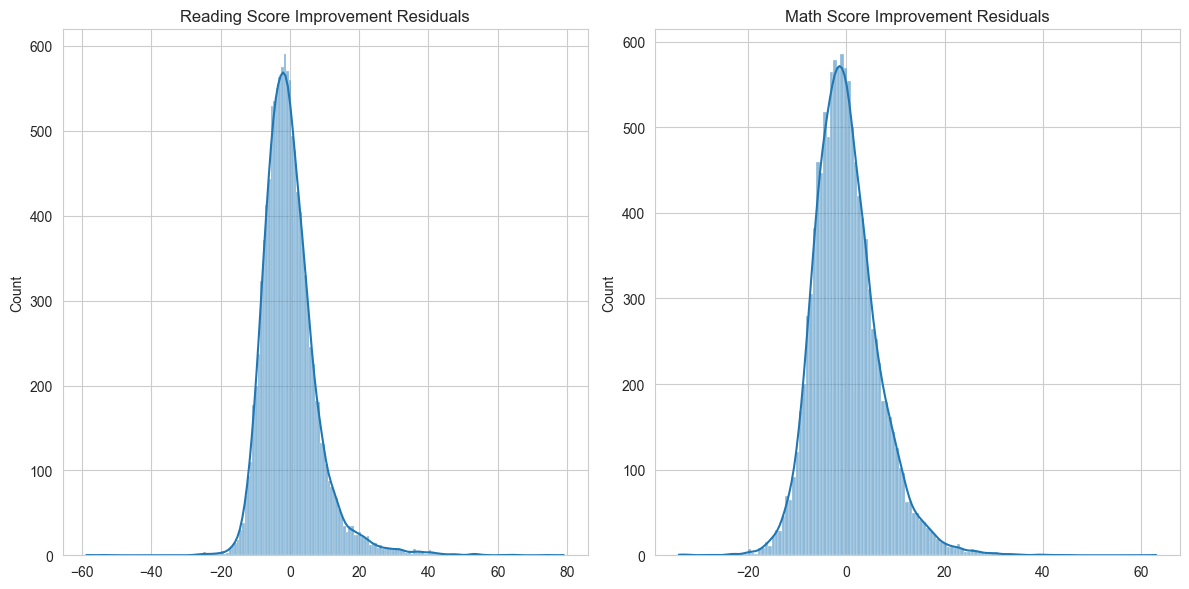

(ShapiroResult(statistic=0.8996428847312927, pvalue=0.0),
 ShapiroResult(statistic=0.9664106965065002, pvalue=0.0),
 LeveneResult(statistic=402.8213568734789, pvalue=7.251817279122297e-89),
 LeveneResult(statistic=673.9367248592363, pvalue=1.5061055977772345e-146))

In [59]:
from scipy.stats import shapiro, levene

# Shapiro-Wilk test for normality of residuals
shapiro_reading = shapiro(model_1.resid)
shapiro_math = shapiro(model_2.resid)

# Levene's test for homogeneity of variances
levene_reading = levene(df['springreadingscore'], df['fallreadingscore'])
levene_math = levene(df['springmathscore'], df['fallmathscore'])

# Plotting the residuals to visually assess normality
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(model_1.resid, kde=True)
plt.title('Reading Score Improvement Residuals')

plt.subplot(1, 2, 2)
sns.histplot(model_2.resid, kde=True)
plt.title('Math Score Improvement Residuals')

plt.tight_layout()
plt.show()

shapiro_reading, shapiro_math, levene_reading, levene_math